<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    21.389693  93.189662  23.496562   884.767541  1032.843459   
      1.0    98.292749  49.615176  93.369343  -991.362594  -740.085326   
      2.0    53.155170  47.983001  84.828972   350.322254   546.289398   
      3.0    27.955944  26.213191  92.218743  -220.169927   -63.782050   
      4.0    81.042157  78.269938  80.106323 -1681.351819 -1431.933401   
...                ...        ...        ...          ...          ...   
999.0 115.0  62.987188  88.355206  58.748101  -582.397040  -362.306545   
      116.0  62.133008  70.524051  36.127899  -187.342610    -8.557652   
      117.0  23.358885  33.311270  57.991327   220.398998   345.060481   
      118.0  43.960608  71.290204  61.508693   846.348253  1033.107758   
      119.0  34.685859  30.665491  53.438275  -604.979035  -476.189409   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    398.129190   634.714269  
      1.0     -2.953645  -737.131681  
      2.0      6.492845   539.796553  
      3.0    -99.219628    35.437579  
      4.0    121.907163 -1553.840563  
...                 ...          ...  
999.0 115.0  161.242710  -523.549256  
      116.0  132.818015  -141.375667  
      117.0  367.744263   -22.683782  
      118.0  252.262543   780.845215  
      119.0  328.454712  -804.644121  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    21.389693  93.189662  23.496562   884.767541  1032.843459   
      1.0    98.292749  49.615176  93.369343  -991.362594  -740.085326   
      2.0    53.155170  47.983001  84.828972   350.322254   546.289398   
      3.0    27.955944  26.213191  92.218743  -220.169927   -63.782050   
      4.0    81.042157  78.269938  80.106323 -1681.351819 -1431.933401   
...                ...        ...        ...          ...          ...   
999.0 115.0  62.987188  88.355206  58.748101  -582.397040  -362.306545   
      116.0  62.133008  70.524051  36.127899  -187.342610    -8.557652   
      117.0  23.358885  33.311270  57.991327   220.398998   345.060481   
      118.0  43.960608  71.290204  61.508693   846.348253  1033.107758   
      119.0  34.685859  30.665491  53.438275  -604.979035  -476.189409   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    398.129190   634.714269  
      1.0     -2.953645  -737.131681  
      2.0      6.492845   539.796553  
      3.0    -99.219628    35.437579  
      4.0    121.907163 -1553.840563  
...                 ...          ...  
999.0 115.0  161.242710  -523.549256  
      116.0  132.818015  -141.375667  
      117.0  367.744263   -22.683782  
      118.0  252.262543   780.845215  
      119.0  328.454712  -804.644121  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    21.389693  93.189662  23.496562   884.767541  1032.843459   
      1.0    98.292749  49.615176  93.369343  -991.362594  -740.085326   
      2.0    53.155170  47.983001  84.828972   350.322254   546.289398   
      3.0    27.955944  26.213191  92.218743  -220.169927   -63.782050   
      4.0    81.042157  78.269938  80.106323 -1681.351819 -1431.933401   
...                ...        ...        ...          ...          ...   
999.0 115.0  62.987188  88.355206  58.748101  -582.397040  -362.306545   
      116.0  62.133008  70.524051  36.127899  -187.342610    -8.557652   
      117.0  23.358885  33.311270  57.991327   220.398998   345.060481   
      118.0  43.960608  71.290204  61.508693   846.348253  1033.107758   
      119.0  34.685859  30.665491  53.438275  -604.979035  -476.189409   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    398.129190   634.714269  
      1.0     -2.953645  -737.131681  
      2.0      6.492845   539.796553  
      3.0    -99.219628    35.437579  
      4.0    121.907163 -1553.840563  
...                 ...          ...  
999.0 115.0  161.242710  -523.549256  
      116.0  132.818015  -141.375667  
      117.0  367.744263   -22.683782  
      118.0  252.262543   780.845215  
      119.0  328.454712  -804.644121  

[120000 rows x 7 columns]

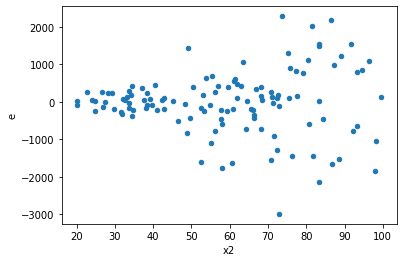

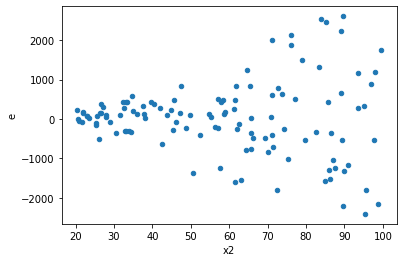

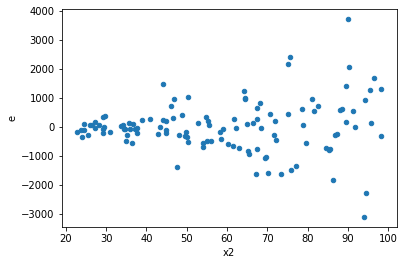

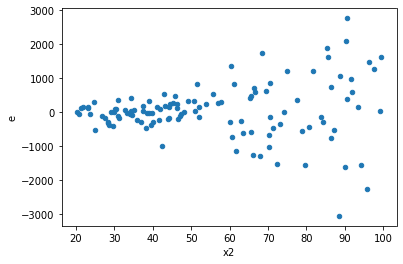

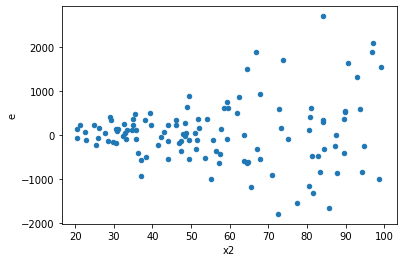

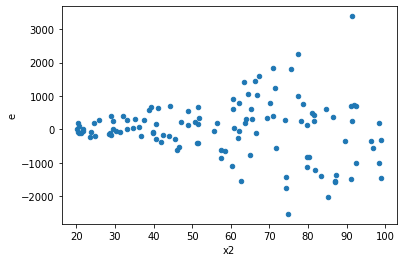

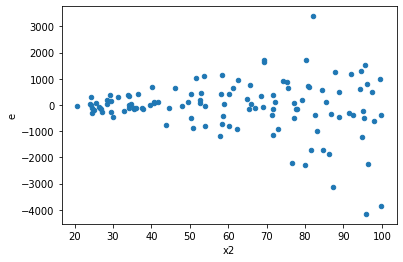

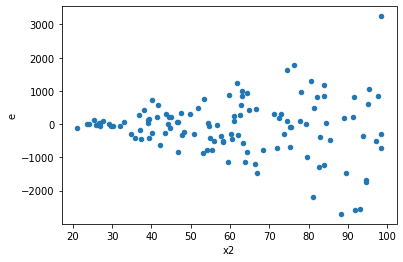

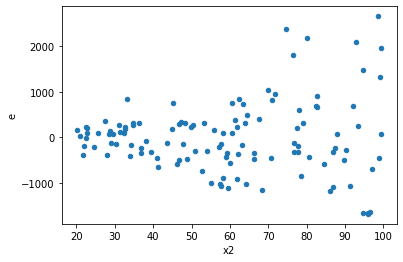

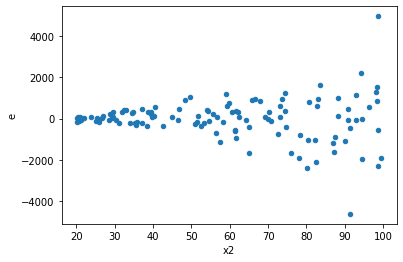

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,33625033.81326119,43574582.72638826,747222.9736280264,968324.0605864058,1.2958970678924082,0.3879292051559431,0.8060353974220285,0.19396460257797155,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,11528391.528475393,36496375.115675494,256186.47841056428,811030.5581261221,3.1657820629641704,0.00018014977430613754,0.9999099251128469,9.007488715306877e-05,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,8356936.423201031,36116952.18578465,185709.69829335625,802598.9374618812,4.321793341099807,2.75621692913397e-06,0.9999986218915354,1.378108464566985e-06,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,31284814.258891344,32805046.933261286,695218.0946420298,729001.0429613619,1.048593309897561,0.8742506351032566,0.5628746824483717,0.4371253175516283,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,19515500.292807102,31463796.808784693,433677.78428460227,699195.4846396599,1.6122464880073517,0.11280601007560143,0.9435969949621993,0.05640300503780071,Reject005=1 : Homoscedasticity
12.0,45.0,45.0,11147224.148169413,58707043.08187561,247716.0921815425,1304600.9573750135,5.266516784944746,1.3937814125064563e-07,0.9999999303109294,6.968907062532281e-08,Reject005=0 : Heteroscedasticity
13.0,45.0,45.0,10991378.246735219,45890664.53093938,244252.8499274493,1019792.5451319861,4.1751510593833245,4.527154636280173e-06,0.9999977364226819,2.2635773181400864e-06,Reject005=0 : Heteroscedasticity
14.0,45.0,45.0,5332931.664293116,46437559.0235194,118509.59253984703,1031945.7560782088,8.707698119299776,2.76560996326225e-11,0.999999999986172,1.382804981631125e-11,Reject005=0 : Heteroscedasticity
18.0,45.0,45.0,25335432.381718904,32114118.137047593,563009.6084826423,713647.0697121688,1.2675575318075067,0.42958216509098146,0.7852089174545093,0.21479108254549073,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,33625033.81326119,43574582.72638826,747222.9736280264,968324.0605864058,1.2958970678924082,0.3879292051559431,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,11528391.528475393,36496375.115675494,256186.47841056428,811030.5581261221,3.1657820629641704,0.00018014977430613754,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,8356936.423201031,36116952.18578465,185709.69829335625,802598.9374618812,4.321793341099807,2.75621692913397e-06,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,56233644.25990944,6719384.57010725,1249636.5391090987,149319.65711349444,0.11949046978087617,5.650791724770747e-11,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,35755224.589250416,34749850.2698901,794560.546427787,772218.8948864467,0.9718817506837147,0.9242105706743732,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,31284814.258891344,32805046.933261286,695218.0946420298,729001.0429613619,1.048593309897561,0.8742506351032566,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,27874188.235507537,16797637.85530916,619426.4052335008,373280.8412290924,0.6026233916979683,0.09286629848752832,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,19515500.292807102,31463796.808784693,433677.78428460227,699195.4846396599,1.6122464880073517,0.11280601007560143,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,45007222.991321854,17739528.924157307,1000160.5109182635,394211.75387016236,0.39414848873430347,0.002271242183669485,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    679
Reject005=1 : Homoscedasticity      321
Name: Result_test, dtype: int64